In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [2]:
data = pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
X = data[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts']]

In [4]:
le_geography = LabelEncoder()
X['Geography'] = le_geography.fit_transform(X['Geography'])

le_gender = LabelEncoder()
X['Gender'] = le_gender.fit_transform(X['Gender'])

# Select the target variable
y = data['CreditScore']  # You can change this to any other numeric target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<ipython-input-4-3c7ef7cabd00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Geography'] = le_geography.fit_transform(X['Geography'])
<ipython-input-4-3c7ef7cabd00>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = le_gender.fit_transform(X['Gender'])


In [5]:
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))

# Adding more hidden layers
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# Adding the output layer (since it's regression, no activation or use 'linear')
model.add(Dense(units=1, activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 386610.7500 - mean_squared_error: 386610.7500 - val_loss: 7495.9043 - val_mean_squared_error: 7495.9043
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6095.8086 - mean_squared_error: 6095.8086 - val_loss: 4358.7988 - val_mean_squared_error: 4358.7988
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3623.6790 - mean_squared_error: 3623.6790 - val_loss: 2915.7390 - val_mean_squared_error: 2915.7390
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2455.3291 - mean_squared_error: 2455.3291 - val_loss: 1943.3098 - val_mean_squared_error: 1943.3098
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1636.1360 - mean_squared_error: 1636.1360 - val_loss: 1256.3688 - val_mean_squared_error: 1256.3688
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1063.6992 - mean_squared_error: 1063.6992 - val_loss: 767.5600 - val_mean_squared_error: 767.5600
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━

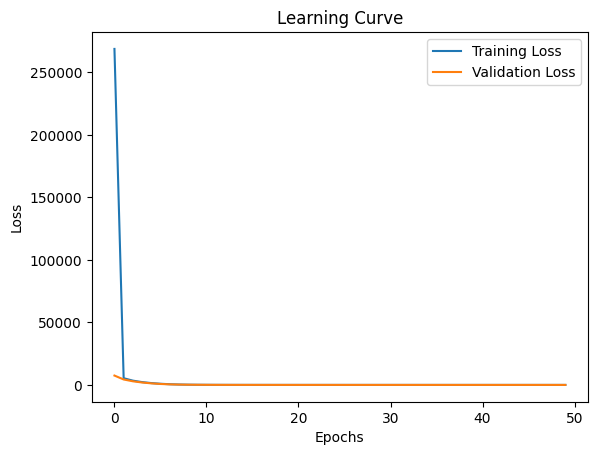

In [8]:
# Fit the model and store the training history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))  # Adjust epochs and batch_size as needed

# Evaluate the model on the test set
test_loss, test_mse = model.evaluate(X_test, y_test)
print(f'Test MSE: {test_mse}')

# Plotting the learning curve
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()